## Problem Set 2: Merging and regular expressions

**Total points (without extra credit)**: 30 

**Background on the policy context**: here, we're going to use two datasets to practice reshaping, merging, and regular expression patterns. Both datasets relate to the broader issue of which employers might be violating the rights of temporary guestworkers granted visas under the H-2A program. Here are some articles about potential exploitation of guestworkers by firms and inequality caused by minimal oversight:

- News media coverage of labor abuses of temporary guestworkers: https://www.buzzfeednews.com/article/kenbensinger/the-pushovers 
- GAO report on labor abuses of temporary guestworkers: https://www.gao.gov/products/gao-15-154

The following datasets are located in `pset2_inputdata` (need to unzip): 

- `jobs_clean`: a dataset of guestworker jobs posted by many employers, some of whom have been debarred (banned) from the program for labor abuses; others not debarred
- `debar`: a dataset of employers who committed violations of labor regulations meant to protect temporary guestworkers 


You can view a codebook here: https://docs.google.com/spreadsheets/d/1rF9GJEC8pPKxipD0TsoG9DVdqz3EJ-b-BHEtyioAX7I/edit?usp=sharing


In [27]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# 1. Reshaping data (13 points total)

Load the following dataset stored in `pset2_inputdata`: `debar.csv`

This represents employers temporarily banned from hiring workers (debar.csv); call this `debar`


View the head()


In [28]:
## your code here
debar = pd.read_csv("pset2_inputdata/debar.csv")
debar.head()

,Name,"City, State",Violation,Duration,Start date,End date
0,J&J Harvesting,"Leads, ND",Failure to respond to audit (partial response),2 years,1/19/2014,1/18/2016
1,"Stahlman Apiaries, Inc","Selby, SD",Failure to respond to audit (partial response),1 year,2/19/2015,2/14/2016
2,Trust Nursery,"Pulaski, NY",Failure to respond to audit (partial response),1 year,3/21/2014,3/20/2015
3,Anton Fertilizer Inc.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016
4,"Great Plains Fluid Service, Inc.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016


## 1.1 (1 point)

Print the number of rows in `debar` versus the number of unique employer names (`Name`). Is there one row per employer or multiple rows for some employers?

In [29]:
## your code here
debar.shape[0]   
debar["Name"].nunique()

114

98

## Rows vs Employers
There are multiple rows for some employers.  There are 114 rows but only 98 unique employers.

## 1.2 Investigating duplicated rows (2 points)

A. Create a new column in `debar`--`is_repeated`-- that tells us whether an employer (`Name`) is repeated > 1 times

*Hint*: there are multiple ways to solve this but some possibilities to get the list of names that are repeated are:
- Using value_counts() on the `Name` variable and extracting the index from that value counts 
- Using groupby to count the rows attached to one name

B. Print the rows where `is_repeated == True` and interpret

C. Subset to the rows where `is_repeated == True` and save that data as `mult_debar`. Print the head() and shape

In [30]:
## your code here
repeated = debar.Name.value_counts()
mult = []
for x in repeated.index:
    if repeated[x] > 1:
        mult.append(x)
        
# create is_repeated column
debar["is_repeated"] = debar["Name"].isin(mult)

# print where is_repeated == True
debar[debar["is_repeated"]]

# subset
mult_debar = debar[debar["is_repeated"]]
mult_debar.head()
mult_debar.shape


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True
14,Sharon Mathis,"Tifton, GA",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
15,SRT Farms,"Morton, TX",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
16,Mark Duncan,"Roosevelt, UT",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
17,"Maple Ridge Custom Services, LLC","Altheimer, AK",Failure to respond to audit (partial response),2 years,11/16/2014,11/15/2016,True
18,F&W Farms,"Ingalls, KS",Failure to respond to audit (partial response),2 years,12/10/2014,12/9/2016,True


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True


(32, 7)

## 1.3 Reshape mult_debar to wide to begin filtering out duplicates (4 points)

You want to separate out two cases:

- Cases where the repeat rows for one employer are due to duplicated data 
- Cases where the repeat rows for one employer represent repeated violations for different issues

There are various ways to check duplicates in this data (eg converting `Violation` to lowercase; replacing spelled-out states with two-dig state codes)

We're going to use the simple rule of:

- A row is a duplicate if, within an employer (defined by Name + City, State), the Start date for each row's violation is the same 

To begin to check this, reshape `mult_debar` to a wide dataframe (`mult_debar_wide`) with the following columns, treating the `Name` and `City, State` as the index for the pivot:

- Name
- City, State
- start_date_viol1
- start_date_viol2

Print the head and shape

In [31]:
## your code here
mult_debar_new = mult_debar.copy()
state = ["Annabella, Utah", "Caddo, Texas", "Brownsville, TX", "Altheimer, AK"]
replace_state = ["Annabella, UT", "Caddo, TX", "Brownfield, TX", "Altheimer, AR"]
mult_debar_new["City, State"] = mult_debar_new["City, State"].replace(state, replace_state)

mult_debar_new.loc[:,"viol_num"] = mult_debar_new.groupby(["Name", "City, State"]).cumcount() + 1
mult_debar_wide = mult_debar_new.pivot_table(index=["Name", "City, State"], columns="viol_num", values="Start date", aggfunc="first")
mult_debar_wide.columns = ["start_date_viol1", "start_date_viol2"]
mult_debar_wide.head()
mult_debar_wide.shape


,,start_date_viol1,start_date_viol2
Name,"City, State",,
Annabella Land & Cattle,"Annabella, UT",5/9/2014,5/9/2014
Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014
"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",7/20/2014,7/20/2014
Cisco Produce Inc.,"Cairo, GA",12/10/2014,12/10/2015
Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018


(16, 2)

## 1.4 Filter out duplicates from original debar data (6 points)

A. Using `mult_debar_wide`, add a column `is_dup` that takes value of True for cases where start_date_viol1 == start_date_viol2 marking the row as a duplicate

B. Going back to the original long-format data you loaded at the beginning- `debar`
    - For employers where `is_dup == True` as indicated by your wide-format dataframe, only keep `violnum == viol1`
    - For all other employers (so is_dup == False and ones we didnt need to check duplicates for), keep all violnum
    - Remove the `is_repeated` column from the `debar` data

**Hint**: you can complete part B without a for loop; `pd.concat` with axis = 0 (row binding) is one way

Call the resulting dataframe `debar_clean` and print the shape and # of unique employer names

In [32]:
## your code here
# create is_dup column
mult_debar_wide["is_dup"] = mult_debar_wide["start_date_viol1"] == mult_debar_wide["start_date_viol2"]

# create list of duplicates
mult_debar_wide = mult_debar_wide.reset_index().set_index("Name")
dups = mult_debar_wide[mult_debar_wide["is_dup"]].index

# create viol_num column in debar to use when determining which rows to keep
debar.loc[:,"viol_num"] = debar.groupby(["Name", "City, State"]).cumcount() + 1

# keep the first violation of duplicates
dups_keep = debar[(debar["Name"].isin(dups)) & (debar["viol_num"] == 1)]

# keep the non duplicates
nondups_keep = debar[~debar["Name"].isin(dups)]

# merge the rows you want to keep
debar_clean = pd.concat([dups_keep, nondups_keep], axis = 0)

# remove the is_repeated row
debar = debar.drop(columns="is_repeated", errors="ignore")
debar = debar.drop(columns="viol_num")
debar_clean = debar_clean.drop(columns="viol_num", errors="ignore")

debar_clean

# print num rows of the df and the number of unique names
debar_clean.shape
debar_clean["Name"].nunique()

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True
...,...,...,...,...,...,...,...
107,Walker Place,"Danville, IL",Failure to comply with the employer's obligati...,2 months,11/19/2019,1/26/2020,False
108,County Fair Farm (company) and Andrew Williams...,"Jefferson, ME",WHD Debarment,3 years,3/8/2017,3/8/2020,False
110,Jesus Ledesma,"Mulberry, FL",Failure to Respond to Audit Request,2 years,2/8/18,2/8/20,False
112,B & R Harvesting and Paul Cruz (individual),"Collins, Georgia",WHD Debarment,3 years,4/9/17,4/9/20,False


(105, 7)

98

# 2. Merging and regex (17 points total)



## 2.1 Load data on job postings

The previous dataset contains a small subset of employers who faced temporary bans due to violations of H-2A program regulations

Since most of the bans have expired, we're going to see which of those employers posted new H-2A jobs in the first quarter of 2021 

Loading the `jobs_clean.csv` data stored in `pset2_inputdata`

In [33]:
# your code here to load the data 

jobs = pd.read_csv("pset2_inputdata/jobs.csv")


##  2.2 Try inner join on employer name  (2 points)

- Use the `EMPLOYER_NAME` field of the `jobs` dataset
- Use the `Name` field of the `debar_clean` dataset 

A. Use pd.merge with an inner join on those fields to see whether there are any exact matches. 

B. If there are exact matches, print the row(s) with exact matches



In [34]:
## your code here
merged_jobs = jobs.merge(debar_clean, left_on = "EMPLOYER_NAME", right_on = "Name", how = "inner")

merged_jobs

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,Rafael Barajas,NaN,...,NaN,https://seasonaljobs.dol.gov/,7,Rafael Barajas,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017,False


## 2.3 Targeted regex (10 points total)

You want to see if you can increase the exact match rate with some basic cleaning of each 
of the employer name fields in each dataset 

### 2.3.1 Converting to upper (2 points)

A. Convert the `EMPLOYER_NAME` and `Name` fields to uppercase using list comprehension rather than df.varname.str.upper() (it's fine to do a separate list comprehension line for each of the two columns)

B. Print a random sample of 15 values of each result

C. Assign the full vector of uppercase names back to the original data, writing over the original `EMPLOYER_NAME` and `Name` columns 


In [35]:
## insert your code to turn into uppercase here
jobs_upper = [name.upper() for name in jobs['EMPLOYER_NAME']]
debar_upper = [name.upper() for name in debar_clean['Name']]


In [36]:
## insert your code for the random sample
random.sample(jobs_upper, 15)
random.sample(debar_upper, 15)

['BAYOU FARMS BIN SERVICES & REPAIR, LLC',
 'HONEY LAND FARMS II, LLC',
 'HOPPER- STEPHENS HATCHERIES, INC.',
 'JKA  CATTLE LLC',
 'SOUTHWIND ORCHARDS',
 'BONNIE PLANTS, INC.',
 'AG LABOR LLC',
 'KEN IVERSEN FARMS',
 'VIE SAUVAGE',
 'DUSTIN J LEBEOUF',
 'EVERGLADES HARVESTING, INC.',
 'CSS FARMS, LLC ',
 'HOLBROOK SEED POTATOES, INC.',
 'VAN RUITEN DAIRY PARTNERS',
 'MAPLE RIDGE FRUIT FARM LLC']

['VALLEY VIEW ORCHARDS',
 'JOHN R. COOK',
 'LOV RANCH CO, LLLP DBA LOV RANCH',
 'ABE- NANCY FROESE',
 'RB FARM PICKING INC, DBA RONALD BERNARD',
 'B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL)',
 'CITY PINESTRAW AND HARVESTING',
 'CIRA CORTEZ LOPEZ',
 'DAVID C. MARTINEZ',
 'CISCO PRODUCE INC.',
 'YOLANDA CHAVEZ FARMING',
 'CHRIS ROBINSON',
 '69 FARMS LLC',
 'ROSALVA GARCIA',
 'OLD TREE FARMS/VERPAALEN CUSTOM SERVICE']

In [37]:
## insert your code for assigning the uppercase names back to the data
jobs['EMPLOYER_NAME'] = jobs_upper
debar_clean['Name'] = debar_upper

jobs.head()
debar_clean.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,ADDENDUM_B_HOUSING_ATTACHED,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS
0,H-300-20199-721302,Determination Issued - Withdrawn,2020-07-17 14:50:40.840,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,Y,"FAZIO FARMS OPERATING COMPANY, LLC",NaN,...,N,1,Y,12.68,12.68,55.0,13607017661,faziofarms@gmail.com,NaN,0
1,H-300-20231-773906,Determination Issued - Certification,2020-08-20 10:38:15.620,2020-10-01 00:00:00.000,Association - Agent,N,Seasonal,N,CHARLIE SUNDERLAND,Panter & Sunderland Nursery,...,N,1,N,NaN,12.68,55.0,19318083783,NaN,https://www.jobs4tn.gov/vosnet/Default.aspx,0
2,H-300-20231-774123,Determination Issued - Certification,2020-08-24 15:33:14.340,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,MICHAEL RUDEBUSCH,NaN,...,N,1,N,NaN,12.68,55.0,19369333827,fayethlynpitre@rocketmail.com,NaN,0
3,H-300-20231-774151,Determination Issued - Certification,2020-08-21 12:08:09.760,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,LODAHL FARMS,NaN,...,Y,2,N,NaN,12.68,55.0,14069637560,lodahl_kelsey@yahoo.com,NaN,0
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"DUNSON HARVESTING, INC.","Dunson Harvesting, Inc.",...,Y,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,ANNABELLA LAND & CATTLE,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,AUTUMN HILL ORCHARD,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,LOEWEN HARVESTING LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,ROLLO FARM LABOR CONTRACTOR,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True


### 2.3.2 Cleaning up punctuation (4 points)

You notice that INC, CO, and LLC are sometimes followed by a period (.) but sometimes not

A. For each dataset, write a regex pattern using `re.sub` to remove the . but only if it's preceded by INC, LLC, or CO 

Make sure LLC, INC, CO remain part of the string but just without the dot

B. Test the pattern on the positive and negative example we provide below and print the result. See the Github issue for examples of what to return


**Hint**: https://stackoverflow.com/questions/7191209/python-re-sub-replace-with-matched-content



In [38]:
pos_example_1 = "CISCO PRODUCE INC."
pos_example_2 = "AVOYELLES HONEY CO., LLC"
neg_example = "E.V. RANCH LLP"

In [39]:
## insert your code here with the regex pattern for part A
regex = r"(INC|LLC|CO)\."

## insert your code to use re.sub to apply the pattern to the test cases for part B
res = [re.sub(regex, r"\1", name) for name in [pos_example_1, pos_example_2, neg_example]]
res

['CISCO PRODUCE INC', 'AVOYELLES HONEY CO, LLC', 'E.V. RANCH LLP']

### 2.3.3 (4 points)

Use that pattern in conjunction with `re.sub` and list comprehension to clean the employer name columns in each dataset. Save the new columns as `name_clean` in each. Then, use row subsetting to (1) subset to rows that changed names and (2) for:

- `debar_clean` print the `Name` and `name_clean` columns
- `jobs` print the `EMPLOYER_NAME` and `name_clean` columns

Make sure to use the uppercase versions of the variables


In [40]:
## your code here to clean the columns
# remove the periods
jobs_punc = [re.sub(regex, r"\1", name) for name in jobs['EMPLOYER_NAME']]
debar_punc = [re.sub(regex, r"\1", name) for name in debar_clean['Name']]

# assigne the new columns
jobs["name_clean"] = jobs_punc
debar_clean["name_clean"] = debar_punc

# create the subsetted dataframes that only include changed rows
sub_jobs = jobs[jobs["name_clean"] != jobs["EMPLOYER_NAME"]]
sub_debar = debar_clean[debar_clean["name_clean"] != debar_clean["Name"]]
sub_jobs[["EMPLOYER_NAME", "name_clean"]]
sub_debar[["Name", "name_clean"]]


,EMPLOYER_NAME,name_clean
4,"DUNSON HARVESTING, INC.","DUNSON HARVESTING, INC"
7,"FARM LABOR ASSOCIATION FOR GROWERS, INC.","FARM LABOR ASSOCIATION FOR GROWERS, INC"
14,"MCLAIN FARMS, INC.","MCLAIN FARMS, INC"
17,"BONNIE PLANTS, INC.","BONNIE PLANTS, INC"
18,"B & W QUALITY GROWERS, INC.","B & W QUALITY GROWERS, INC"
...,...,...
2700,HARRAL LIVESTOCK CO. LLC,HARRAL LIVESTOCK CO LLC
2701,ECOSYSTEM CONCEPTS INC.,ECOSYSTEM CONCEPTS INC
2702,SIDDOWAY SHEEP CO.,SIDDOWAY SHEEP CO
2705,SATHER MANAGEMENT INC.,SATHER MANAGEMENT INC


,Name,name_clean
3,ANTON FERTILIZER INC.,ANTON FERTILIZER INC
4,"GREAT PLAINS FLUID SERVICE, INC.","GREAT PLAINS FLUID SERVICE, INC"
5,PROMAX INC.,PROMAX INC
13,REIMER'S INC.,REIMER'S INC
19,CISCO PRODUCE INC.,CISCO PRODUCE INC
23,REIMER’S INC.,REIMER’S INC
33,GERONIMO SHEEP CO.,GERONIMO SHEEP CO
46,ALTENDORF TRANSPORT INC.,ALTENDORF TRANSPORT INC
56,CISCO PRODUCE INC.,CISCO PRODUCE INC
72,"SAXTONS RIVER ORCHARDS, INC.","SAXTONS RIVER ORCHARDS, INC"


In [41]:
## your code here to print the head
## print
sub_jobs.head()
sub_debar.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,name_clean
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"DUNSON HARVESTING, INC.","Dunson Harvesting, Inc.",...,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4,"DUNSON HARVESTING, INC"
7,H-300-20233-780540,Determination Issued - Certification (Expired),2020-09-04 14:26:00.270,2020-10-01 00:00:00.000,Association - Joint Employer,N,Seasonal,N,"FARM LABOR ASSOCIATION FOR GROWERS, INC.",NaN,...,1,Y,13.5,13.50,55.0,17605922256,flag@sfcos.com,NaN,9,"FARM LABOR ASSOCIATION FOR GROWERS, INC"
14,H-300-20240-791807,Determination Issued - Certification (Expired),2020-09-17 18:57:56.030,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,"MCLAIN FARMS, INC.",NaN,...,1,N,NaN,12.68,55.0,19125268436,kim@mclainfarms.com,NaN,1,"MCLAIN FARMS, INC"
17,H-300-20244-795767,Determination Issued - Certification,2020-09-16 12:58:58.600,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,"BONNIE PLANTS, INC.",NaN,...,1,N,NaN,12.68,55.0,13343911328,dennis.ucles@bonnieplants.com,NaN,0,"BONNIE PLANTS, INC"
18,H-300-20245-799651,Determination Issued - Certification,2020-09-02 11:17:48.730,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,"B & W QUALITY GROWERS, INC.",NaN,...,33,N,NaN,12.68,55.0,17725711135,NaN,www.employflorida.com,7,"B & W QUALITY GROWERS, INC"


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,name_clean
3,ANTON FERTILIZER INC.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016,False,ANTON FERTILIZER INC
4,"GREAT PLAINS FLUID SERVICE, INC.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016,False,"GREAT PLAINS FLUID SERVICE, INC"
5,PROMAX INC.,"Whitewater, KS",Failure to Hire U.S. workers,2 years,5/15/2014,5/14/2016,False,PROMAX INC
13,REIMER'S INC.,"Lakin, KS",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,False,REIMER'S INC
19,CISCO PRODUCE INC.,"Cairo, GA",Failure to respond to audit (no response),2 years,12/10/2014,12/9/2016,True,CISCO PRODUCE INC


## 2.4 More joins and more cleaning (5 points)

A. Conduct another inner join between `jobs` and `debar_clean` now using the `name_clean` column; print the result. Did the cleaning result in any more employers matched between the two datasets?

B. Create a new column in `debar_clean` called `name_clean_2` that uses regex to take the following name in that dataset:

- `SLASH E.V. RANCH LLP` in the `debar_clean` dataset

And cleans it up so that it matches with this employer in `jobs`

- `SLASH EV RANCH` in the `jobs` dataset

Eg a pattern to remove the dots in the EV and the space+LLP-- you can apply the pattern to all employer names in debar_clean (so don't need to worry about only applying it to that one employer)


C. Conduct a left join using `name_clean_2` as the join column where the left hand dataframe is `jobs`; right hand dataframe is `debar_clean`, store the result as a dataframe, and print the rows where the merge indicator indicates the row was found in both dataframe

**Note**: this manual cleaning process is inefficient and helps motivate why talked about fuzzy matching. Fuzzy matching could recognize that Slash EV ranch is a highly similar string to slash ev ranch llp and match them without us needing to use regex to make the strings identical.

In [42]:
## your code here
merged_jobs2 = jobs.merge(debar_clean, on="name_clean", how = "inner")
merged_jobs2
# No more employers were matched in this merge, still just one.

regex2 = r"(\w+)(\.)(\w)(\.)(.+)(\sLLP)"

clean_name = [re.sub(regex2, r"\1\3\5", name) for name in debar_clean["name_clean"]]
debar_clean["name_clean_2"] = clean_name

merged_jobs3 = jobs.merge(debar_clean, left_on="name_clean", right_on="name_clean_2", how = "left", indicator="naics_merge_status")
merged_jobs3[merged_jobs3["naics_merge_status"] == "both"]



,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,name_clean,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,https://seasonaljobs.dol.gov/,7,RAFAEL BARAJAS,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017,False


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,name_clean_y,name_clean_2,naics_merge_status
791,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017,False,RAFAEL BARAJAS,RAFAEL BARAJAS,both
1115,H-300-20306-894148,Determination Issued - Certification,2020-11-02 18:11:29.140,2020-11-24 00:00:00.000,Individual Employer,N,Seasonal,N,SLASH EV RANCH,NaN,...,SLASH E.V. RANCH LLP,"Rifle, CO",WHD Debarment,1 year,11/15/2014,11/14/2015,False,SLASH E.V. RANCH LLP,SLASH EV RANCH,both


# 3. Optional extra credit 1: regex to separate companies from individuals (1 point)

You notice some employers in `debar_clean` have both the name of the company and the name of individual, e.g.:
    
COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*

Use the uppercase/cleaned `name_clean` in `debar_clean`

A. Write a regex pattern that does the following:
    - Captures the pattern that occurs before COMPANY if (COMPANY) is in string; so in example above, extracts COUNTY FAIR FARM 
    - Captures the pattern that occurs before INDIVIDUAL if (INDIVIDUAL) is also in string -- so in above, extracts ANDREW WILLIAMSON (so omit the "and")
    
B. Test the pattern on `pos_example` and `neg_example`-- make sure former returns a list (if using find.all) or match object (if using re.search) with the company name and individual name separated out; make sure latter returns empty
    
**Hints and resources**: for step A, you can either use re.search, re.match, or re.findall; don't worry about matching B&R Harvesting and Paul Cruz (Individual)

- Same regex resources as above
    

In [43]:
pos_example = "COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*"
neg_example = "CISCO PRODUCE INC"

## your code here to define the pattern
pattern = r"(.*?)\s*\(COMPANY\)\s+AND\s+(.*?)\s*\(INDIVIDUAL\)"

## your code here to apply it to the pos_example
match_pos = re.search(pattern, pos_example)
if match_pos:
    print("Positive match:", match_pos.groups())
else:
    print("No match on positive example")

## your code here to apply it to the negative example
match_neg = re.search(pattern, neg_example)
if match_neg:
    print("False positive on negative example:", match_neg.groups())
else:
    print("no match on negative example")

Positive match: ('COUNTY FAIR FARM', 'ANDREW WILLIAMSON')
no match on negative example


C. Iterate over the `name_clean` column in debar and use regex to create two new columns in `debar_clean`:
   - `co_name`: A column for company (full `name_clean` string if no match; pattern before COMPANY if one extracted)
   - `ind_name`: A column for individual (full `name_clean` string if no match; pattern before INDIVIDUAL if one extracted)
 


In [44]:
# your code here
# Define a function to apply regex and return co_name and ind_name
def extract_names(name):
    match = re.search(pattern, name)
    if match:
        return pd.Series([match.group(1).strip(), match.group(2).strip()])
    else:
        return pd.Series([name, name])  # fallback: use full string

# Apply it to create two new columns
debar_clean[["co_name", "ind_name"]] = debar_clean["name_clean"].apply(extract_names)
debar_clean

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,name_clean,name_clean_2,co_name,ind_name
6,ANNABELLA LAND & CATTLE,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE
7,AUTUMN HILL ORCHARD,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD
8,"CADDO CREEK RANCH, DBA PARADISE RANCH","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH"
11,LOEWEN HARVESTING LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC
12,ROLLO FARM LABOR CONTRACTOR,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR
...,...,...,...,...,...,...,...,...,...,...,...
107,WALKER PLACE,"Danville, IL",Failure to comply with the employer's obligati...,2 months,11/19/2019,1/26/2020,False,WALKER PLACE,WALKER PLACE,WALKER PLACE,WALKER PLACE
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,"Jefferson, ME",WHD Debarment,3 years,3/8/2017,3/8/2020,False,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON
110,JESUS LEDESMA,"Mulberry, FL",Failure to Respond to Audit Request,2 years,2/8/18,2/8/20,False,JESUS LEDESMA,JESUS LEDESMA,JESUS LEDESMA,JESUS LEDESMA
112,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),"Collins, Georgia",WHD Debarment,3 years,4/9/17,4/9/20,False,B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL),B & R HARVESTING AND PAUL CRUZ (INDIVIDUAL)


   
D. Print three columns for the rows in `debar_clean` containing the negative example and positive example described above (county fair farm and cisco produce):

- `name_clean`
- `co_name`
- `ind_name`
- `Violation`

**Note**: as shown in the outcome there may be duplicates of the same company reflecting different violations

In [45]:
# your code here

In [46]:
# Define substrings to search
pos_substr = "COUNTY FAIR FARM"
neg_substr = "CISCO PRODUCE"

# Filter rows where name_clean contains either substring (case-insensitive)
filtered_rows = debar_clean[
    debar_clean["name_clean"].str.contains(pos_substr, case=False) |
    debar_clean["name_clean"].str.contains(neg_substr, case=False)
]

# Display relevant columns
print(filtered_rows[["name_clean", "co_name", "ind_name", "Violation"]])

                                            name_clean            co_name  \
19                                   CISCO PRODUCE INC  CISCO PRODUCE INC   
56                                   CISCO PRODUCE INC  CISCO PRODUCE INC   
108  COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...   COUNTY FAIR FARM   

              ind_name                                   Violation  
19   CISCO PRODUCE INC   Failure to respond to audit (no response)  
56   CISCO PRODUCE INC  Impeding the Audit Process – Non- Response  
108  ANDREW WILLIAMSON                               WHD Debarment  


# 4. Optional extra credit 2 (up to 3 points)

- For 1 point extra credit, create a visualization with 1+ of the existing fields in either the raw `jobs` or `debar` data. We'll be showing cool visualizations in class so use your imagination! Options could include visualizing between-state or over-time variation

- For 3 points extra credit instead, geocode the employer addresses in `jobs` and plot the addresses of jobs as points overlaid on top of a map of Georgia 
    - **Note**: this extra credit involves Googling since we have not yet covered spatial data. 
        - For discussion of how to geocode addresses -> lat/long, see: https://www.natasshaselvaraj.com/a-step-by-step-guide-on-geocoding-in-python/ 
        - For discussion of plotting lat/long dots against a map, see this discussion of geopandas: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
    - Relevant columns include `EMPLOYER_ADDRESS_1` 
    - The geocoding might have a long runtime so feel free to implement it in a separate .py script that you submit alongside your notebook and to just read in the geocoded data

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 37 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'TX'),
  Text(1, 0, 'GA'),
  Text(2, 0, 'Georgia'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'KS'),
  Text(5, 0, 'KY'),
  Text(6, 0, 'SD'),
  Text(7, 0, 'Texas'),
  Text(8, 0, 'NY'),
  Text(9, 0, 'North Dakota'),
  Text(10, 0, 'CO'),
  Text(11, 0, 'CA'),
  Text(12, 0, 'UT'),
  Text(13, 0, 'ND'),
  Text(14, 0, 'LA'),
  Text(15, 0, 'OK'),
  Text(16, 0, 'Florida'),
  Text(17, 0, 'Utah'),
  Text(18, 0, 'AR'),
  Text(19, 0, 'MT'),
  Text(20, 0, 'Tennessee'),
  Text(21, 0, 'IL'),
  Text(22, 0, 'Massachusetts'),
  Text(23, 0, 'Idaho'),
  Text(24, 0, 'North Carolina'),
  Text(25, 0, 'Louisiana'),
  Text(26, 0, 'MD'),
  Text(27, 0, 'AK'),
  Text(28, 0, 'Vermont'),
  Text(29, 0, 'Arkansas'),
  Text(30, 0, 'California'),
  Text(31, 0, 'SC'),
  Text(32, 0, 'ID'),
  Text(33, 0, 'MN'),

Text(0.5, 1.0, 'Number of Debar Violations by State')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Number of Violations')

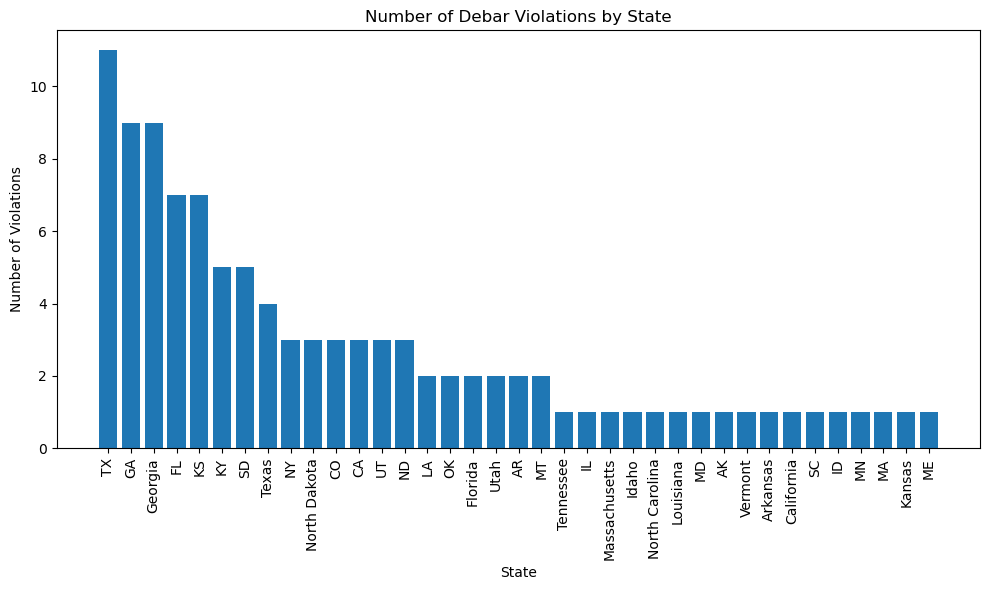

     state  violations
0       TX          11
1       GA           9
2  Georgia           9
3       FL           7
4       KS           7


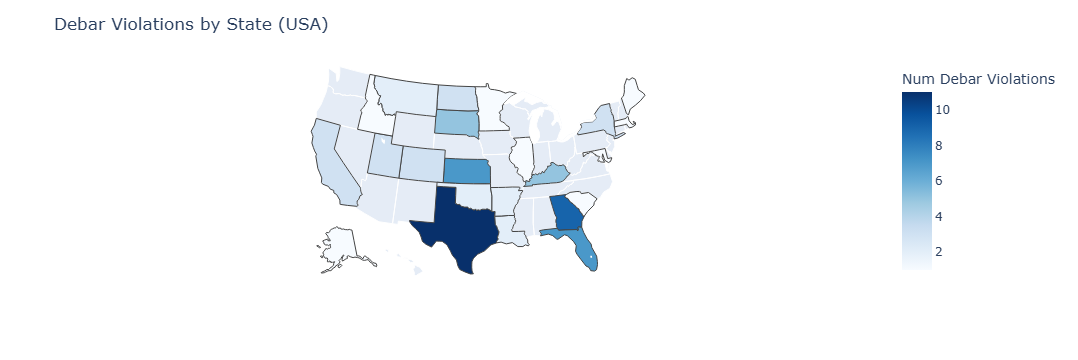

In [47]:
## your code here
import matplotlib.pyplot as plt

# Extract state from the "City, State" column
debar_clean['State'] = debar_clean['City, State'].str.split(',').str[1].str.strip()

# Count how many violations occurred in each state
state_counts = debar_clean['State'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Debar Violations by State')
plt.xlabel('State')
plt.ylabel('Number of Violations')
plt.tight_layout()
plt.show()

# import plotly to help with geographic expression
import plotly.express as px

# Derive the USPS state code:
debar_clean['State'] = (debar_clean['City, State'].str.split(',').str[1].str.strip()) # take what is before comma and strip spaces

# state_counts has "state" and "violations"
state_counts = (debar_clean['State'].value_counts().rename_axis('state').reset_index(name='violations'))

print(state_counts.head())

# call Plotly 
fig = px.choropleth(state_counts, locations='state', locationmode="USA-states", color='violations', scope="usa", color_continuous_scale="Blues", labels={'violations': 'Num Debar Violations'})
fig.update_layout(title_text="Debar Violations by State (USA)")